In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr = pd.read_csv('HR.csv')

Признаки:
#### 1. satisfaction_level​ - Уровень удовлетворенности работой
#### 2. Last_evaluation ​- Время с момента последней оценки в годах
#### 3. number_projects​ - Количество проектов, выполненных за время работы
#### 4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
#### 5. time_spend_company​ - Стаж работы в компании в годах
#### 6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
#### 7. left​ - уволился ли сотрудник
#### 8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
#### 9. department ​- отдел в котором работает сот
#### 10. salary​ - относительный уровень зарплаты

In [3]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr.info() # Общая информация (пропуски отсутствуют)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe() # Расчет основных статистик (среднее, мин/макс, сред.отклонение)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr.median() # Расчет основных статистик (медиана)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7824\3606465650.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hr.median() # Расчет основных статистик (медиана)


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
hr.mode() # Расчет основных статистик (мода)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


По полю **average_montly_hours** встречаются два наиболее частых значения (135, 156)

In [8]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
hr_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project',
               'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
               'promotion_last_5years']].corr()

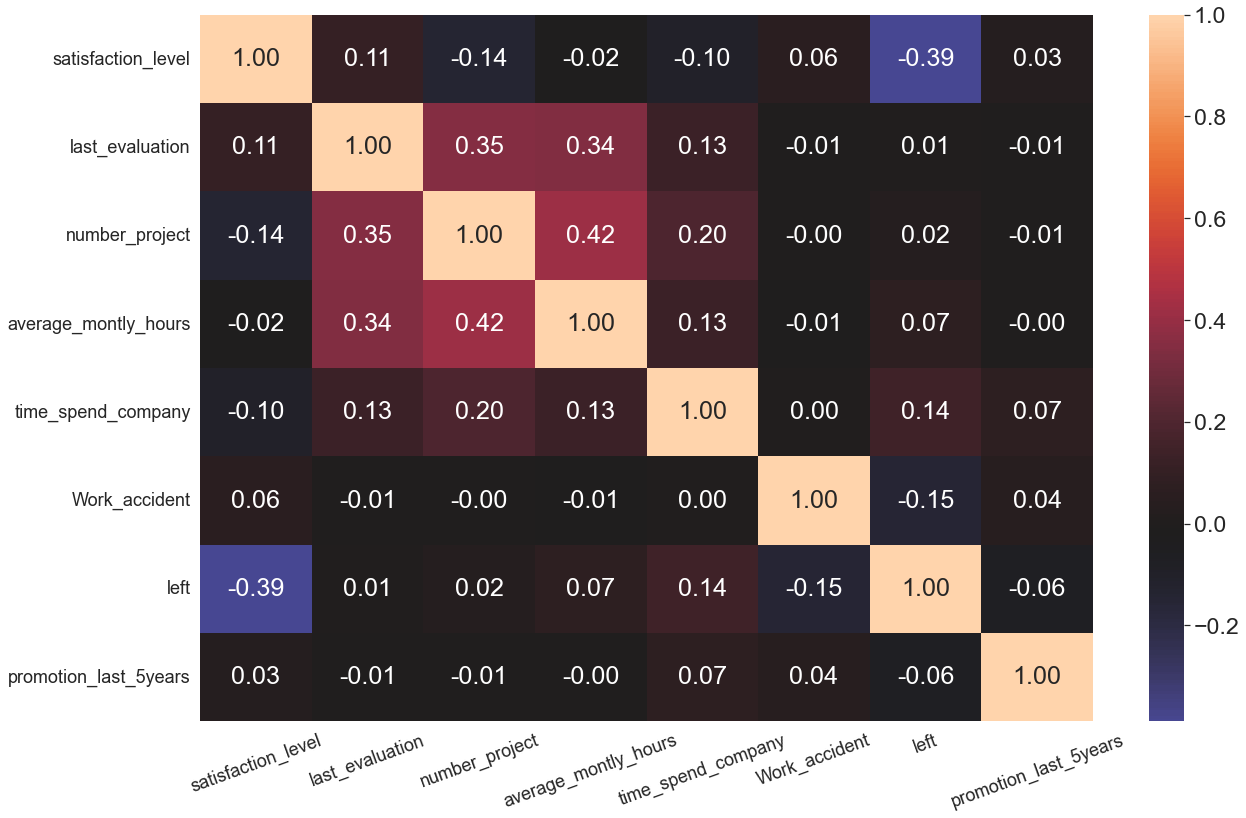

In [10]:
plt.figure(figsize=(20, 13))
plt.rcParams.update({'font.size': 40})
sns.set(font_scale=2.1)
sns.heatmap(hr_corr, fmt=".2f",annot=True, center= -.02)
plt.yticks(rotation=0, fontsize=18) 
plt.xticks(rotation=20, fontsize=18) 
plt.show();

<div class="alert alert-info">
<div class="line">- Самая высокая корреляционная зависимость наблюдается между полями <b>number_projects</b> (количество проектов, выполненных за время работы) и <b>average_monthly_hours</b> (среднее количество часов на рабочем месте в месяц)</div>
<div class="line">- Самая низкая корреляционная зависимость наблюдается между полями <b>satisfaction_level</b> (уровень удовлетворенности работой) и <b>left</b> (уволился ли сотрудник)</div>
</div>

In [11]:
hr.reset_index().groupby('department').agg({'index':'count'}).reset_index().rename(columns={'index':'cnt_employees'})
# Кол-во сотрудников, работающих в каждом департаменте 

,department,cnt_employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


In [12]:
hr.reset_index().groupby('salary').agg({'index':'count'}).reset_index().rename(columns={'index':'cnt_employees'})
# Распределение сотрудников по зарплатам

,salary,cnt_employees
0,high,1237
1,low,7316
2,medium,6446


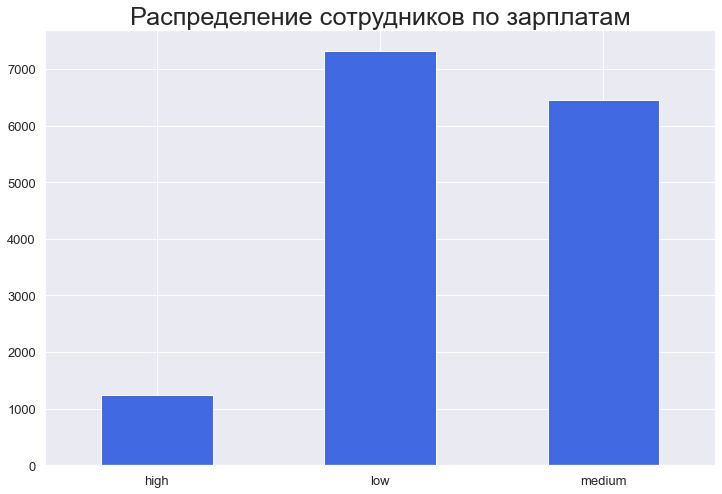

In [13]:
df = hr.reset_index().groupby('salary').agg({'index':'count'}).reset_index()
ax = df.plot.bar(x='salary', 
            y='index', 
            rot=0,
            legend=False,
            color=['#4169E1'],
            figsize=(12,8),
            fontsize=13,
            title = 'Распределение сотрудников по зарплатам', 
            xlabel='')

In [14]:
hr.reset_index().groupby(['department', 'salary']) \
.agg({'index':'count'}) \
.reset_index()\
.rename(columns={'index':'cnt_employees'})
# Распределение сотрудников по зарплатам в каждом департаменте 

,department,salary,cnt_employees
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [15]:
df = hr.reset_index().groupby(['department', 'salary']).agg({'index':'count'}).reset_index()
high = df[df['salary'] == 'high'].rename(columns={'index':'high'})[['department', 'high']]
low = df[df['salary'] == 'low'].rename(columns={'index':'low'})[['department', 'low']]
medium = df[df['salary'] == 'medium'].rename(columns={'index':'medium'})[['department', 'medium']]
df = high.merge(low, left_on='department', right_on='department', how='inner')\
.merge(medium, left_on='department', right_on='department', how='inner').groupby('department').max()

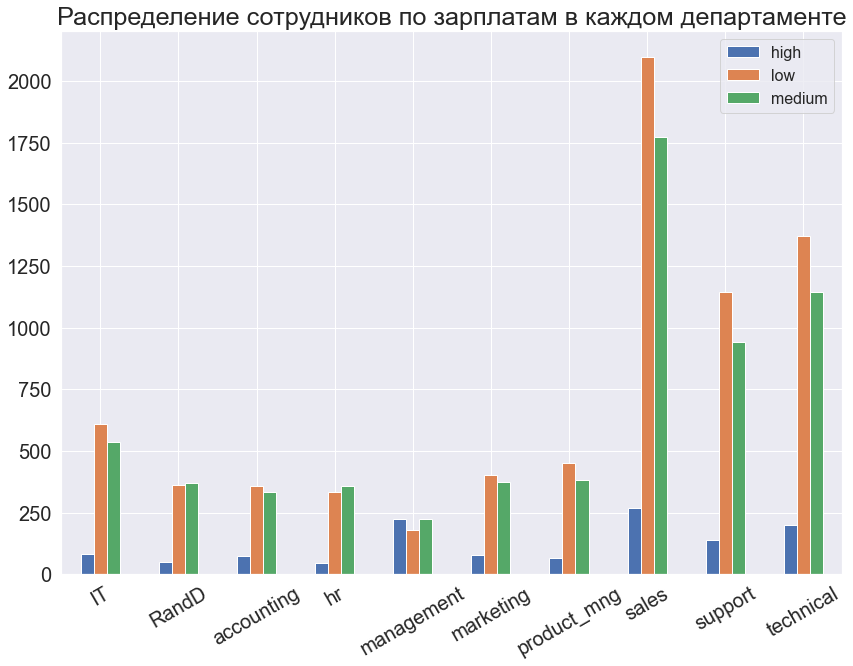

In [16]:
df.plot.bar(fontsize=20, 
            figsize=(14,10), 
            rot=30, 
            xlabel='', 
            ylabel='', 
            title= 'Распределение сотрудников по зарплатам в каждом департаменте').legend(prop={'size': 16})

#### Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

По среднему значению

In [17]:
hr[hr['salary'] == 'low']['average_montly_hours'].mean()

200.9965828321487

In [18]:
hr[hr['salary'] == 'medium']['average_montly_hours'].mean()

201.33834936394663

In [19]:
hr[hr['salary'] == 'high']['average_montly_hours'].mean()

199.86742118027485

<div class="alert alert-info">
<b>Вывод</b>: по среднему значению по полю <b>average_monthly_hours</b>, сотрудники с низким окладом проводят больше времени на рабочем месте, чем сотрудники с высоким окладом.
</div>

По медианному значению 

In [20]:
hr[hr['salary'] == 'low']['average_montly_hours'].median()

199.0

In [21]:
hr[hr['salary'] == 'medium']['average_montly_hours'].median()

201.0

In [22]:
hr[hr['salary'] == 'high']['average_montly_hours'].median()

199.0

<div class="alert alert-info">
<b>Вывод</b>: по медианному значению по полю <b>average_monthly_hours</b>, сотрудники с низким и высоким окладом проводят одинаковое кол-во времени. 
<br>Гипотеза не подтвердилась</br>
</div>

### Уволившиеся сотрудники

In [23]:
hr[hr['left'] == 1] 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [24]:
hr[hr['left'] == 1].reset_index().groupby('promotion_last_5years')\
.agg({'index':'count'}).rename(columns={'index':'cnt_employees'}).reset_index()
# Доля сотрудников с повышением за последние 5 лет

,promotion_last_5years,cnt_employees
0,0,3552
1,1,19


array([<AxesSubplot:>], dtype=object)

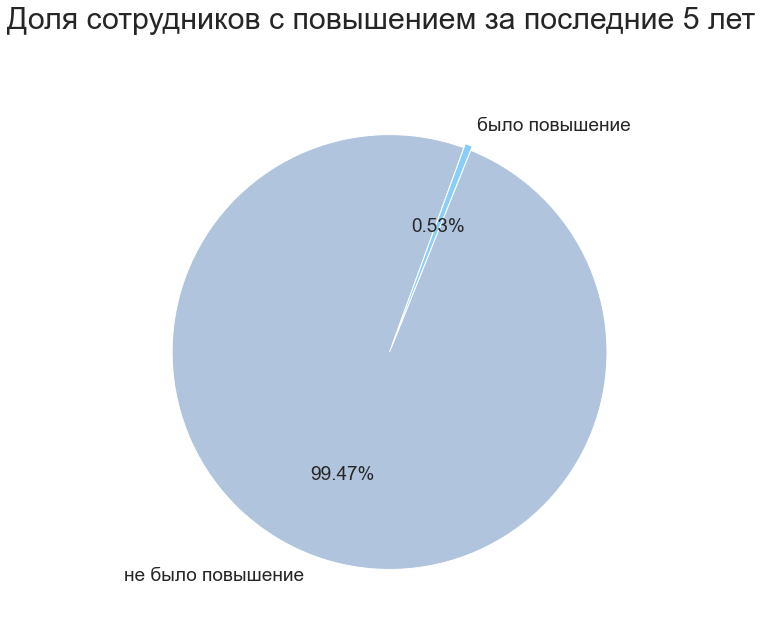

In [25]:
color_palette_list = ['#B0C4DE', '#87CEFA']
hr[hr['left'] == 1].reset_index().groupby('promotion_last_5years')\
.agg({'index':'count'}).rename(columns={'index':'cnt_employees'}).plot.pie(
    y='cnt_employees', 
    subplots=True, 
    autopct='%1.2f%%', 
    figsize=(10, 10), 
    explode=[.01, .01],
    legend=False,
    title = 'Доля сотрудников с повышением за последние 5 лет', 
    colors=color_palette_list,
    textprops={'fontsize': 19},
    startangle=70,
    labels=['не было повышение', 'было повышение'], 
    ylabel=''
)

In [26]:
hr[hr['left'] == 1]['satisfaction_level'].mean()
# Средняя степень удовлетворенности

0.4400980117614114

In [27]:
round(hr[hr['left'] == 1]['number_project'].mean())
# Среднее количество проектов

4

### Не уволившиеся сотрудники

In [28]:
hr[hr['left'] == 0] 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [29]:
hr[hr['left'] == 0].reset_index().groupby('promotion_last_5years')\
.agg({'index':'count'}).rename(columns={'index':'cnt_employees'}).reset_index()
# Доля сотрудников с повышением за последние 5 лет

,promotion_last_5years,cnt_employees
0,0,11128
1,1,300


array([<AxesSubplot:>], dtype=object)

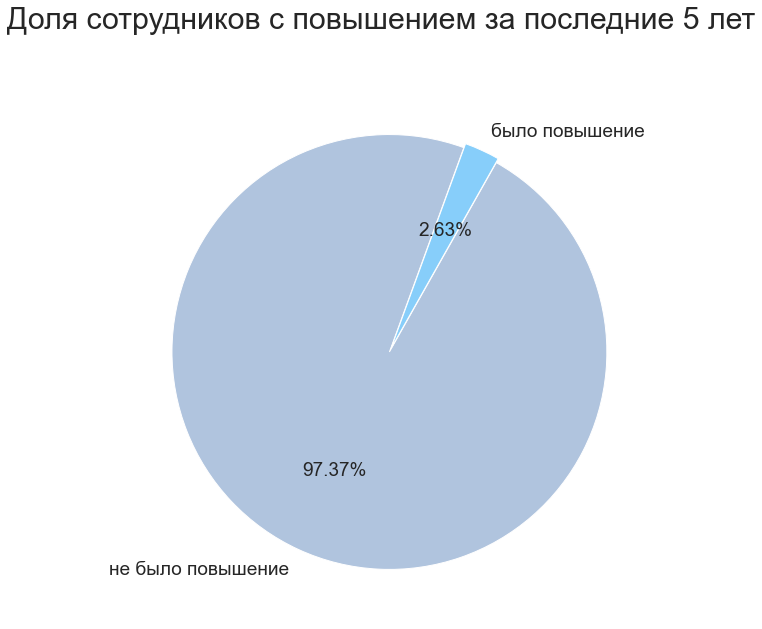

In [30]:
color_palette_list = ['#B0C4DE', '#87CEFA']
hr[hr['left'] == 0].reset_index().groupby('promotion_last_5years')\
.agg({'index':'count'}).rename(columns={'index':'cnt_employees'}).plot.pie(
    y='cnt_employees', 
    subplots=True, 
    autopct='%1.2f%%', 
    figsize=(10, 10), 
    explode=[.01, .01],
    legend=False,
    title = 'Доля сотрудников с повышением за последние 5 лет', 
    colors=color_palette_list,
    textprops={'fontsize': 19},
    startangle=70,
    labels=['не было повышение', 'было повышение'], 
    ylabel=''
)

In [31]:
hr[hr['left'] == 0]['satisfaction_level'].mean()
# Средняя степень удовлетворенности

0.666809590479524

In [32]:
round(hr[hr['left'] == 0]['number_project'].mean())
# Среднее количество проектов

4

<div class="alert alert-info">
<div class="line">
- Среди уволившихся сотрудников средняя степень удовлетворенности составляет 0.44, среднее кол-во проектов - 4, было повышение у 0.53% 
</div>
<div class="line">
- Среди не уволившихся сотрудников средняя степень удовлетворенности составляет 0.67, среднее кол-во проектов - 4, было повышение у 2.63%
</div>
</div>

### LDA

In [33]:
hr_df = hr[['satisfaction_level', 'last_evaluation', 'number_project',
               'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
               'promotion_last_5years']]

In [34]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_df, np.array(hr_df['left']), test_size=0.25, random_state=13)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
lda = LinearDiscriminantAnalysis()

In [37]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
3745,1,0
3746,0,0
3747,1,0
3748,0,0


In [40]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.45725854,  0.66954674, -0.22600941,  0.00475946,  0.22730663,
        -1.05859453,  0.        , -1.12696564]])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# точность модели 
accuracy_score(y_test, lda.predict(X_test))

0.764

<div class="alert alert-info">
Качество модели на тестовой выборки 0.764
</div>